In [43]:
import perceval as pcvl
import perceval.components.unitary_components as comp
import math
from perceval.components.unitary_components import PS, BS, PERM
from perceval import Processor, PostSelect, Port, Circuit

In [44]:
bs = pcvl.BasicState("|0,1>")
print(f"Number of photons: {bs.n}")
print(f"Number of modes: {bs.m}")
print(f"Photons in mode 0: {bs[0]}")
print(f"Photons in mode 1: {bs[1]}")

Number of photons: 1
Number of modes: 2
Photons in mode 0: 0
Photons in mode 1: 1


In [45]:
state = pcvl.BasicState([0, 1]) * pcvl.BasicState([2, 3])
print(state)

|0,1,2,3>


In [46]:
st1 = pcvl.StateVector("|1,0>")
st2 = pcvl.StateVector("|0,1>")
st3 = st1 + st2
print(st3)
print(f"First state: {st3[0]}")
print(f"Second state: {st3[1]}")

sqrt(2)/2*|1,0>+sqrt(2)/2*|0,1>
First state: |0,1>
Second state: |1,0>


In [47]:
# sv = pcvl.StateVector("|0,1,1>") + pcvl.StateVector("|1,1,0>")
# map_measure_sv = sv.measure()
# for s, (p, sv) in map_measure_sv.items():
# print(s, p, sv)

In [48]:
alpha = pcvl.P("alpha")
alpha2 = pcvl.P("phi", min_v=0, max_v=2 * math.pi, periodic=True)

In [49]:
c1 = pcvl.BS(theta=alpha)

In [50]:
c2 = pcvl.BS(theta=alpha) // pcvl.PS(pcvl.P("phi")) // pcvl.BS(theta=alpha)

In [51]:
alpha.set_value(math.pi / 2)
alpha.defined

True

In [52]:
pcvl.pdisplay(c1.compute_unitary(use_symbolic=False))

<IPython.core.display.Math object>

In [53]:
phi1 = pcvl.P("phi1")
phi2 = pcvl.P("phi2")
phi1.set_value(0)
phi2.set_value(0)

In [54]:
mzi = (
    pcvl.Circuit(m=2, name="mzi")
    .add((0, 1), comp.BS(math.pi))
    .add(0, comp.PS(-math.pi / 2))
    .add(1, comp.PS(-math.pi / 2))
)

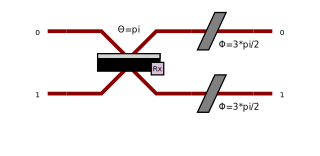

In [55]:
pcvl.pdisplay(mzi)

In [56]:
pcvl.pdisplay(mzi.compute_unitary(use_symbolic=False))

<IPython.core.display.Math object>

In [57]:
from perceval.utils import Encoding

In [58]:
phi1 = pcvl.P("phi1")
theta = pcvl.P("theta")
theta2 = pcvl.P("theta2")
theta3 = pcvl.P("theta3")

In [59]:
phi1.set_value(math.pi)
theta.set_value(2 * math.pi * 54.74 / 180)
theta2.set_value(2 * math.pi * -54.74 / 180)
theta3.set_value(2 * math.pi * 17.63 / 180)

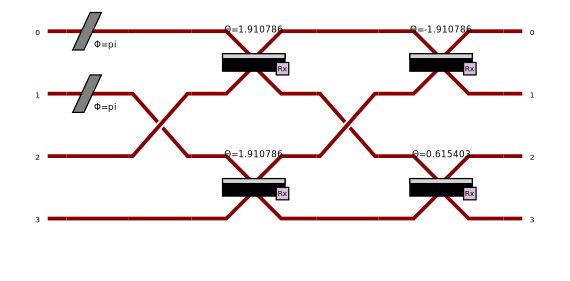

In [60]:
mzi = pcvl.Circuit(m=4, name="mzi")
mzi.add(0, comp.PS(phi1)).add(1, comp.PS(phi1)).add(0, comp.PERM([0, 2, 1, 3])).add(
    (0, 1), comp.BS(theta)
).add((2, 3), comp.BS(theta)).add(0, comp.PERM([0, 2, 1, 3])).add(
    (0, 1), comp.BS(theta2)
).add(
    (2, 3), comp.BS(theta3)
)
pcvl.pdisplay(mzi)

In [61]:
pcvl.pdisplay(mzi.compute_unitary(use_symbolic=False))

<IPython.core.display.Math object>

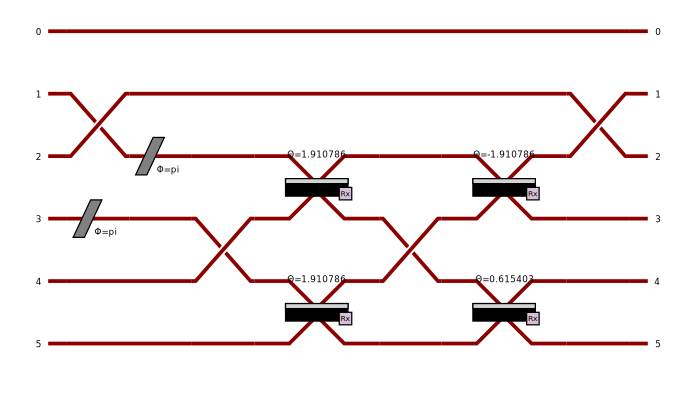

In [62]:
c1 = (
    Circuit(6, name="Heralded CZ")
    .add(1, PERM([1, 0]))
    .add(2, mzi, merge=True)
    .add(1, PERM([1, 0]))
)

p1 = Processor("SLOS", c1)
p1.add_port(0, Port(Encoding.DUAL_RAIL, "ctrl")).add_port(
    2, Port(Encoding.DUAL_RAIL, "data")
).add_herald(4, 1).add_herald(5, 1)
pcvl.pdisplay(c1)

In [63]:
# First,we convert the CZ to a CNOT
proc = Processor("SLOS", 4)
proc.add(2, pcvl.BS.H())
proc.add(0, p1)
proc.add(2, pcvl.BS.H())

states = {
    pcvl.BasicState([1, 0, 1, 0]): "00",
    pcvl.BasicState([1, 0, 0, 1]): "01",
    pcvl.BasicState([0, 1, 1, 0]): "10",
    pcvl.BasicState([0, 1, 0, 1]): "11",
}

ca = pcvl.algorithm.Analyzer(proc, states)

truth_table = {"00": "00", "01": "01", "10": "11", "11": "10"}
ca.compute(expected=truth_table)

pcvl.pdisplay(ca)
print(f"performance = {ca.performance}, fidelity = {ca.fidelity.real}")

,00,01,10,11
00,1,0,0,0
01,0,1,0,0
10,0,0,0,1
11,0,0,1,0


performance = 0.07406604842851178, fidelity = 0.9999999915267557
